In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Giraffes with Hats ENCH 670 Project Code
# Authors: Arman Kushwaha, Asad Siddiqui, Sarah Donayaee, Lila Marino

"""
Defining the Parameters below
"""

# We will be defining Parameters needed for our CVD below. 
MWSi = 28.0855
MWSiHCL3 = 135.452
MWHCL = 36.46
MWH2 = 2.016

P = 1 # pressure in ATM
R = 8.314 # universal gas constant with units (j/mol*k) and (m^3*Pa/mol*K)
rad_wafer = 0.0751 # in meters, 3 inch radius
rad_reactor = 0.3556/2 # in meters, 7 inch radius
rho_sil = 82.962435* 1000 # molar density of Silicon, in mol/m^3

area_wafer = np.pi * (rad_wafer**2)
# now defining the a temperature range for analysis
temp_range  = np.linspace(1000, 2200, num=10) # kelvin is the standard unit for temperature range

"""
Why is this the temp range? Simply put it, tungsten filaments are used with the wiring to electrically heat up the 
low-pressure CVD to the extreme temperatures that they operate at. To that extent, 2200 K seems to be a consistent
stopping place for many LPCVD -- refer to the Science Direct paper for further reasoning. 
"""


"""
Arrehnius mess.
#From Mathematical denomentation, a Lumped Kinetic Rate Constant was obtained when deriving the rate expression.
#The lumped rate constant is just the product of the rate constant of the adsorption rxn and the surface reaction
"""
E1 = (-1.72 * 10**5) 
E2 = (-1.80 * 10**5) /10

kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s
ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s

klump = kad * ksr


# we are going to make a general amount of EGS based on a previously designed process flow diagram

# YearlyProdSi = 1.5 * (10^6) #yearly production of EGS in kg per year
# DailyProdSi = YearlyProdSi * (1/365) * (1/)

# SiHCL3 and H2 enter the reactor at the same flowrate, so both concentrations are same

Fao = 7.056  #mol/s of SiHCL3 that is entering the reactor
Fbo = 7.056 #mol/s H2 entering reactor
FT = Fao + Fbo #total flow entering reactor

Yao = Fao/FT # Compositional fraction of SiHCL3
Ybo = Fbo/FT # Compositional fraction of H2

Cao = (Yao * (P*101325)) / (R * temp_range) #getting initial concentration of SiHCL3 in mol/m3


z_guess = 3 # length of the reactor, ***official reactor length***

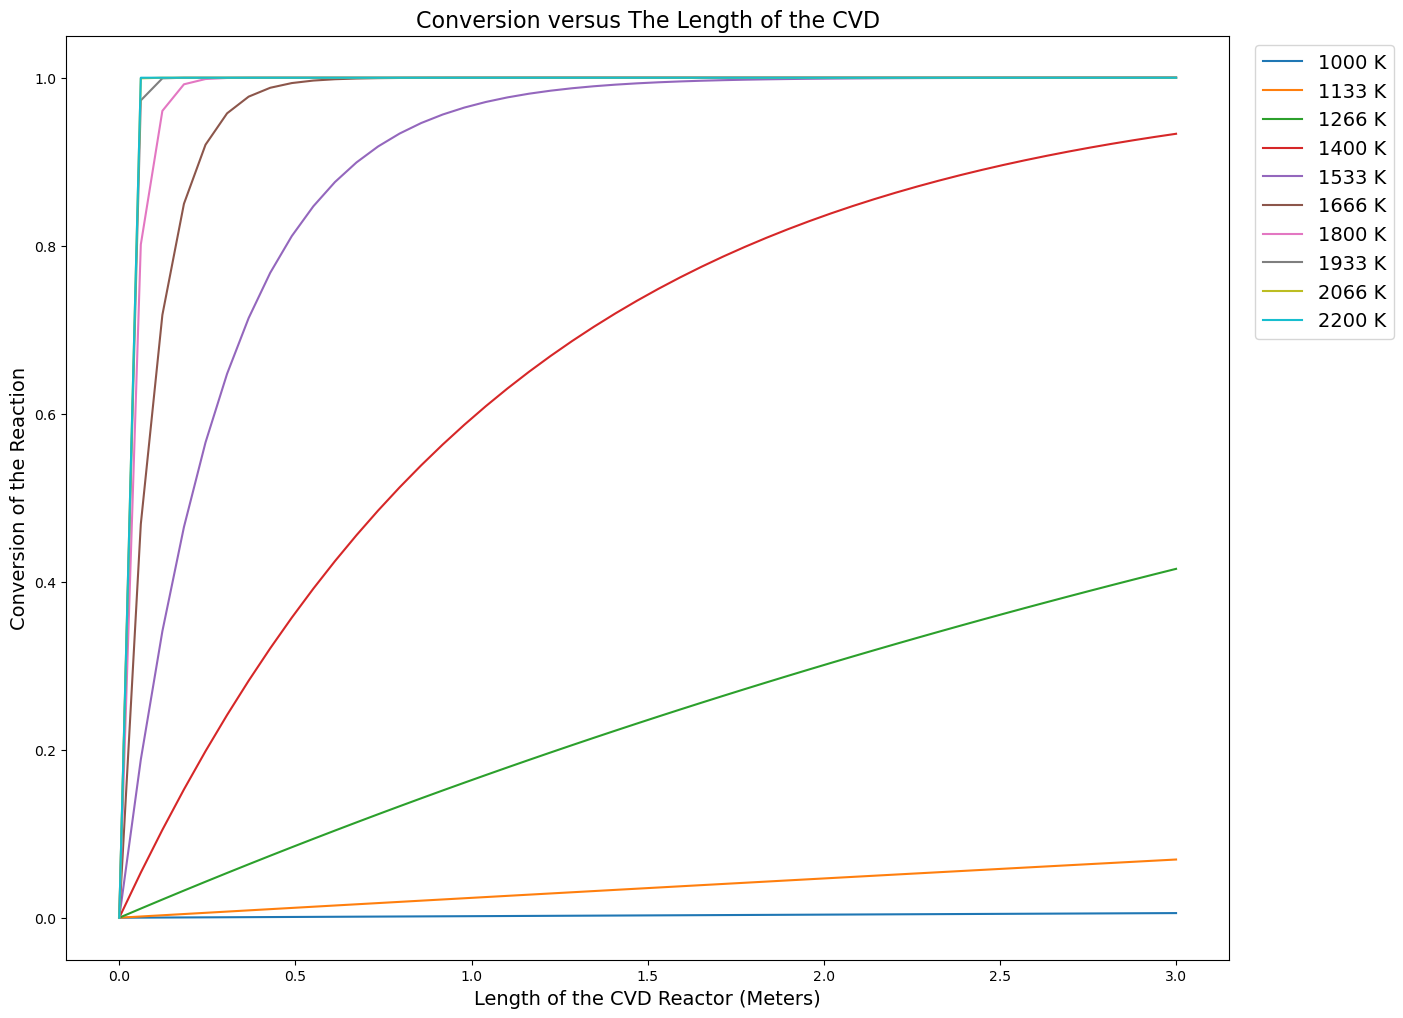

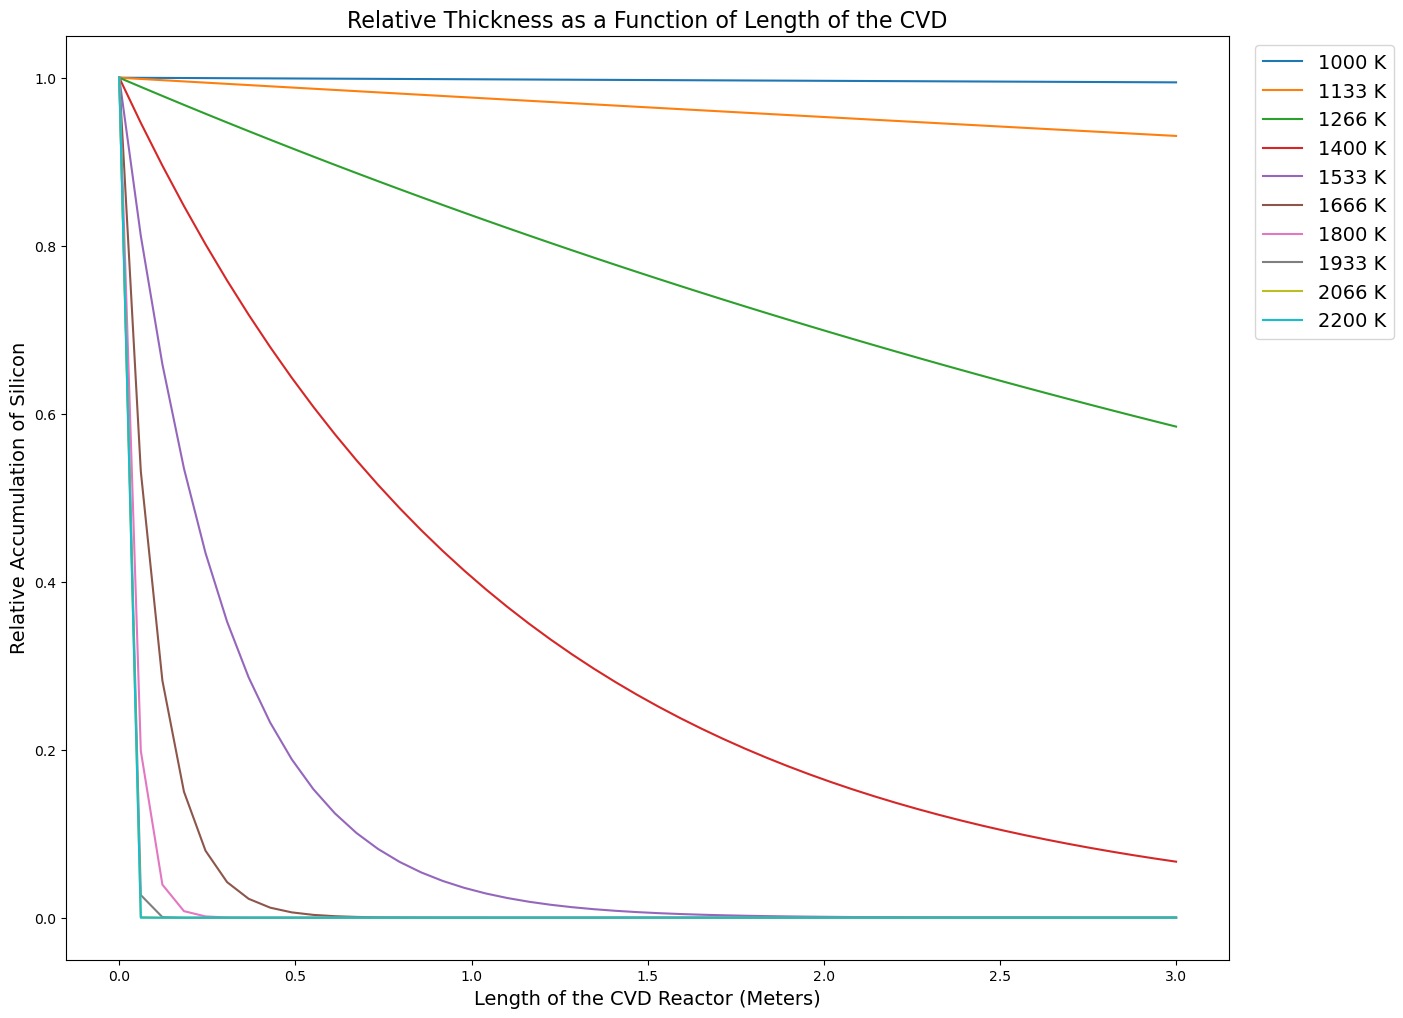

In [2]:
"""
so, the issue is that with the assumptions that were made, some 
mathematical error is being made by making it into an ODE
Therefore, analytical solution was generated and plotted for the 
conversion, then conversely used for the reaction rate down the 
length of the reactor.
""" 

z_span = np.linspace(0, 3) # in meters, the position along the reactor
dam_num = (klump * Cao * area_wafer * np.pi * 
           (rad_reactor**2))/(Fao) # damkolers number

x_anal = [] # empty list generated 

for i in range(len(z_span)):   
    x_vals = 1 - np.exp(-(dam_num * z_span[i]) / z_guess) 
    x_anal.append(x_vals)



plt.figure(figsize=(15, 12))
plt.figure(1)
plt.plot(z_span, x_anal)
plt.xlabel("Length of the CVD Reactor (Meters)", size=14)
plt.ylabel("Conversion of the Reaction", size=14)
plt.title("Conversion versus The Length of the CVD", size=16)
plt.legend(["1000 K", "1133 K", "1266 K", "1400 K", "1533 K", "1666 K", "1800 K", "1933 K", "2066 K", 
            "2200 K"], bbox_to_anchor=(1.15, 1), loc="upper right", fontsize=14)

# NOW WE CAN DEVELOP RATE OF REACTION AS A FUNCTION OF DISTANCE DOWN REACTOR

cv_along = [] # similar procedure followed to generate the major plot
for i in range(len(z_span)):    
    cv_vals = (np.exp(-(dam_num * z_span[i]) / z_guess))
    cv_along.append(cv_vals)
    
plt.figure(figsize=(15, 12))
plt.figure(2)
plt.plot(z_span, cv_along)
plt.xlabel("Length of the CVD Reactor (Meters)", size=14)
plt.ylabel("Relative Accumulation of Silicon", size=14)
plt.title("Relative Thickness as a Function of Length of the CVD", size=16)
plt.legend(["1000 K", "1133 K", "1266 K", "1400 K", "1533 K", "1666 K", "1800 K", "1933 K", "2066 K", 
            "2200 K"], bbox_to_anchor=(1.15, 1), loc="upper right", fontsize=14)


<Figure size 1500x1400 with 0 Axes>

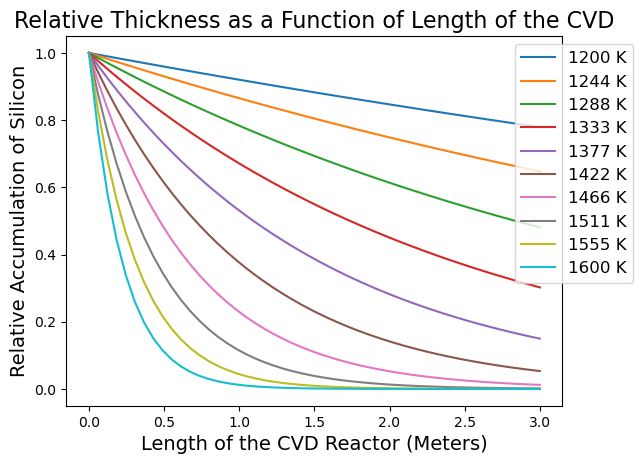

In [3]:
# NOW FURTHER DIVING INTO SPECIFIC TEMPERATURES
temp_range = np.linspace(1200, 1600, 10)
kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s
ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s

klump = kad * ksr
dam_num = (klump * Cao * area_wafer * np.pi * 
           (rad_reactor**2))/(Fao) # damkolers number
cv_along = [] # similar procedure followed to generate the major plot
for i in range(len(z_span)):    
    cv_vals = (np.exp(-(dam_num * z_span[i]) / z_guess))
    cv_along.append(cv_vals)
    
plt.figure(figsize=(15, 14))
plt.figure(3)
plt.plot(z_span, cv_along)
plt.xlabel("Length of the CVD Reactor (Meters)", size=14)
plt.ylabel("Relative Accumulation of Silicon", size=14)
plt.title("Relative Thickness as a Function of Length of the CVD", size=16)
plt.legend(["1200 K", "1244 K", "1288 K", "1333 K", "1377 K", "1422 K", "1466 K", "1511 K", "1555 K", 
            "1600 K"], bbox_to_anchor=(1.16, 1), loc="upper right", fontsize=12)
plt.show()

In [4]:
"""
We tried to automate the points in which we wanted to focus on - using input(), for loops, while loops, and even using
the break-command at some point. However, every time, code would run into sizing errors, and more. So, for the sake of time,
we want to really focus on the temperatures that seemed most relevant in accordance to our safety-based optimization. 
"""


# this is list to hold the ODEINT vals 
viewpoints = []

# function 1
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[0] * Cao[0] * np.exp((kad[0] * Cao[0] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    

In [5]:
# function 2
def f(dt, delT): 
    E1 = (-1.72 * 10**5) 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[1] * Cao[1] * np.exp((kad[1] * Cao[1] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    

In [6]:
# function 3
def f(dt, delT): 
    E1 = (-1.72 * 10**5)
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[2] * Cao[2] * np.exp((kad[2] * Cao[2] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [7]:
# function 4
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[3] * Cao[3] * np.exp((kad[3] * Cao[3] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [8]:
# function 5
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[4] * Cao[4] * np.exp((kad[4] * Cao[4] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [9]:
# function 6
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[5] * Cao[5] * np.exp((kad[5] * Cao[5] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [10]:
# function 7
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[6] * Cao[6] * np.exp((kad[6] * Cao[6] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [11]:
# function 8
def f(dt, delT): 
    E1 = (-1.72 * 10**5) #
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[7] * Cao[7] * np.exp((kad[7] * Cao[7] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [12]:
# function 9
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[8] * Cao[8] * np.exp((kad[8] * Cao[8] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)

In [13]:
# function 10
def f(dt, delT): 
    E1 = (-1.72 * 10**5) # 
    E2 = (-1.80 * 10**5) /10
    kad = (2.72*(10**6)) * np.exp(E1 /(R*temp_range))  # m/s 
    ksr = (5.63*(10**3)) * np.exp(E2 /(R*temp_range))  # m/s
    klump = kad * ksr
    
    delT_dt = (2 *(kad[9] * Cao[9] * np.exp((kad[9] * Cao[9] * 
                                          area_wafer * np.pi * (rad_reactor**2) * z_guess) / Fao))) / rho_sil
    return delT_dt
    
# time span in terms of seconds
t_span = np.linspace(0, 60)
# th represents thickness -- 
th_0 = 0
th_acc = odeint(f, th_0, t_span)
# microns is the standard units per minutes
th_micro = th_acc * 10**6
viewpoints.append(th_micro)


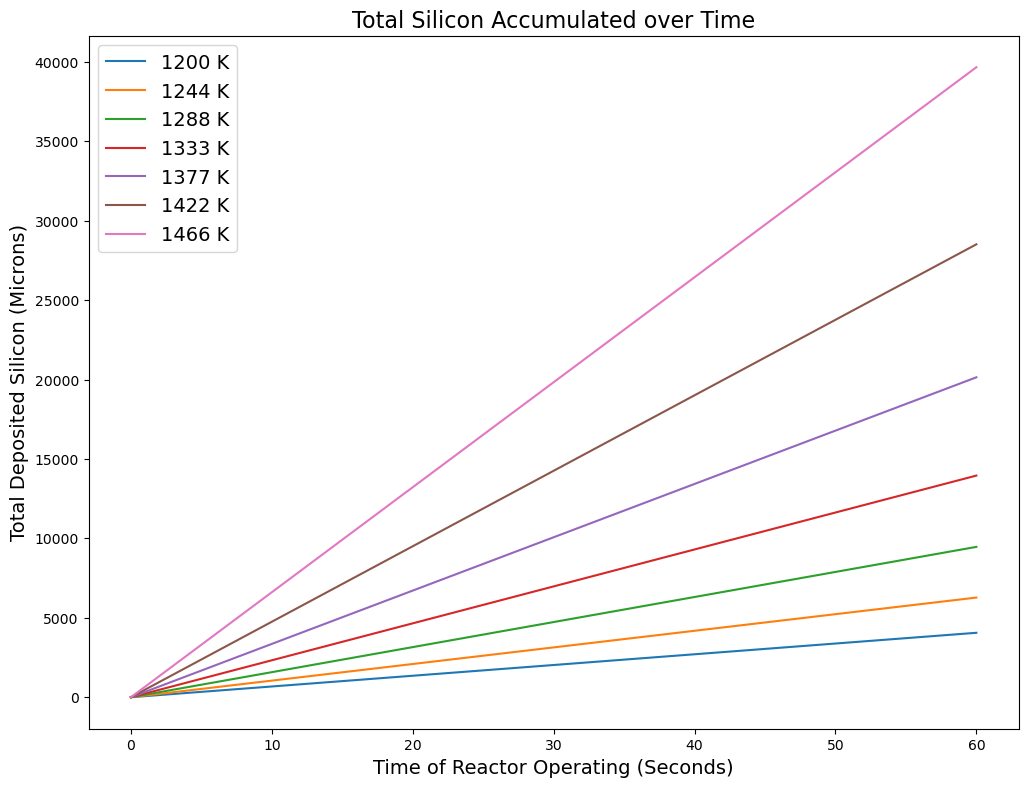

In [14]:
# plotting all saved arrays now 
plt.figure(figsize=(12, 9))
plt.plot(t_span, viewpoints[0])
plt.plot(t_span, viewpoints[1])
plt.plot(t_span, viewpoints[2])
plt.plot(t_span, viewpoints[3])
plt.plot(t_span, viewpoints[4])
plt.plot(t_span, viewpoints[5])
plt.plot(t_span, viewpoints[6])
#plt.plot(t_span, viewpoints[7])
#plt.plot(t_span, viewpoints[8])
#plt.plot(t_span, viewpoints[9])

# labels and arguments

plt.xlabel("Time of Reactor Operating (Seconds)", size=14)
plt.ylabel("Total Deposited Silicon (Microns)", size=14)
plt.title("Total Silicon Accumulated over Time", size=16)
plt.legend(["1200 K", "1244 K", "1288 K", "1333 K", "1377 K", "1422 K", "1466 K"], loc="upper left", fontsize=14)
plt.savefig("total_1")


[20140.057228]


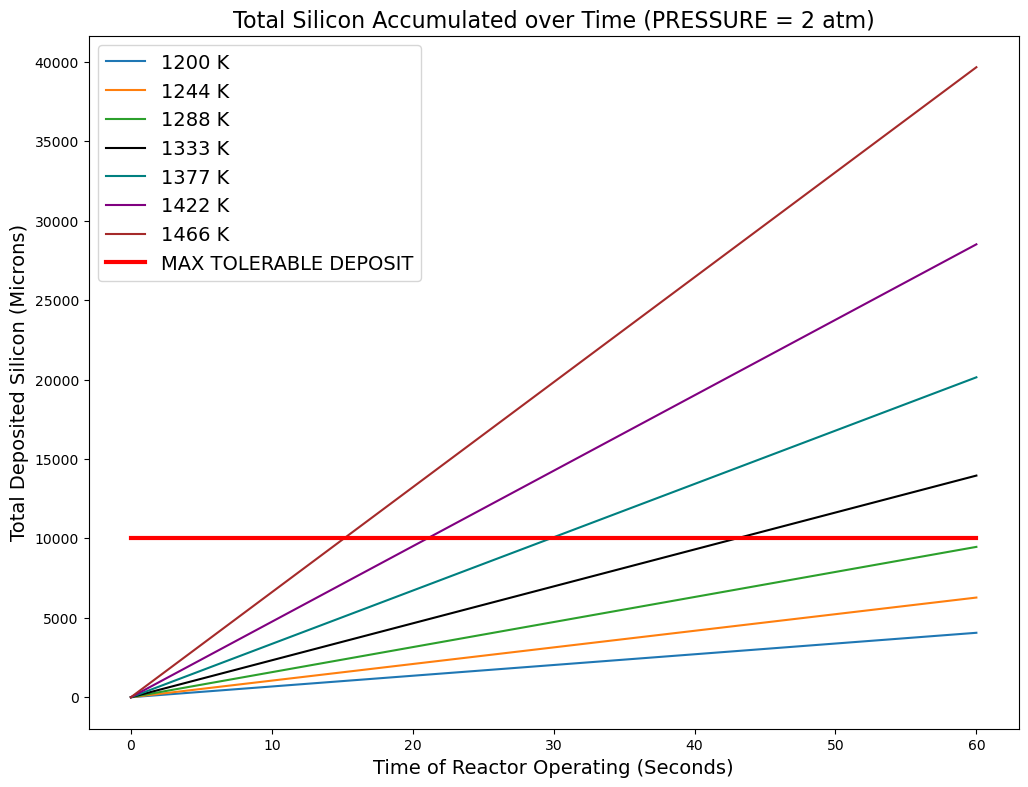

In [17]:
# NOW, WE WILL SHOW A GRAPH THAT REVEALS OUR CUT-OFF RANGE FOR HOW MUCH WE NEED WHILE REMAINING UNDERNEATH PRACTICAL OPERATIONS
# plotting all saved arrays now 
plt.figure(figsize=(12, 9))
plt.plot(t_span, viewpoints[0])
plt.plot(t_span, viewpoints[1])
plt.plot(t_span, viewpoints[2])
plt.plot(t_span, viewpoints[3], color="black")
plt.plot(t_span, viewpoints[4], color="teal")
plt.plot(t_span, viewpoints[5], color="purple")
plt.plot(t_span, viewpoints[6], color="brown")
plt.plot(t_span, np.linspace(10000, 10000, 50), color='red', linewidth=3)

# labels and arguments
plt.xlabel("Time of Reactor Operating (Seconds)", size=14)
plt.ylabel("Total Deposited Silicon (Microns)", size=14)
plt.title("Total Silicon Accumulated over Time (PRESSURE = 2 atm)", size=16)
plt.legend(["1200 K", "1244 K", "1288 K", "1333 K", "1377 K", "1422 K", "1466 K", "MAX TOLERABLE DEPOSIT"], loc="upper left", fontsize=14)
plt.savefig("total_2")
print(viewpoints[4][49]) # microns 

In [16]:
"""
Summary:

-  we optimized the CVD by finding the optimal temperature in accordance
with our physical design criteria, and what we deemed as "optimal production"

- the optimal temperature, asssuming the flow rates stay the same, and 
the reactor was ran at a presssure of 1 atm, was 1377 K (albeit it did  
exceed the max tolerable deposit by a marginal amount). IF we were to 
avoid it all together, any temperature beneath 1377 K would be optimal. 

- while the pressure of the reactor could be increased to further lower 
the temperature, you now run the risk of potentially changing the way the 
silicon would emerge from the wafer molds. Ultimately, lower pressure allows
for a more controllable shape of the emerging silicon. 

"""

'\nSummary:\n\n-  we optimized the CVD by finding the optimal temperature in accordance\nwith our physical design criteria, and what we deemed as "optimal production"\n\n- the optimal temperature, asssuming the flow rates stay the same, and \nthe reactor was ran at a presssure of 1 atm, was 1377 K (albeit it did  \nexceed the max tolerable deposit by a marginal amount). IF we were to \navoid it all together, any temperature beneath 1377 K would be optimal. \n\n- \n\n'